# Special Topics CSC4001 AI/ML Project
## The goal of this project is to build a predictor too look at CO2 emmisions in North America


### By Abdul Mohammed




In [ ]:
#Libraries

In [ ]:
pip install scikit-learn

In [ ]:
pip install --upgrade pandas

In [ ]:
pip install openpyxl

## Importing important ML libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import warnings
warnings.filterwarnings("ignore")
import pandas.util.testing as ts

In [3]:
import io
from google.colab import files

# import owid-co2-data 
## this will be used to make our predicitions

In [4]:
uploaded = files.upload()

Saving owid-co2-data.xlsx to owid-co2-data.xlsx


In [5]:
co2_data = pd.read_excel(io.BytesIO(uploaded['owid-co2-data.xlsx']))     

## Data Exploration

In [6]:
co2_data.head(10)

,iso_code,country,year,co2,co2_per_capita,trade_co2,cement_co2,cement_co2_per_capita,coal_co2,coal_co2_per_capita,...,ghg_excluding_lucf_per_capita,methane,methane_per_capita,nitrous_oxide,nitrous_oxide_per_capita,population,gdp,primary_energy_consumption,energy_per_capita,energy_per_gdp
0,AFG,Afghanistan,1949,0.015,0.002,NaN,NaN,NaN,0.015,0.002,...,NaN,NaN,NaN,NaN,NaN,7624058.0,NaN,NaN,NaN,NaN
1,AFG,Afghanistan,1950,0.084,0.011,NaN,NaN,NaN,0.021,0.003,...,NaN,NaN,NaN,NaN,NaN,7752117.0,9.421400e+09,NaN,NaN,NaN
2,AFG,Afghanistan,1951,0.092,0.012,NaN,NaN,NaN,0.026,0.003,...,NaN,NaN,NaN,NaN,NaN,7840151.0,9.692280e+09,NaN,NaN,NaN
3,AFG,Afghanistan,1952,0.092,0.012,NaN,NaN,NaN,0.032,0.004,...,NaN,NaN,NaN,NaN,NaN,7935996.0,1.001733e+10,NaN,NaN,NaN
4,AFG,Afghanistan,1953,0.106,0.013,NaN,NaN,NaN,0.038,0.005,...,NaN,NaN,NaN,NaN,NaN,8039684.0,1.063052e+10,NaN,NaN,NaN
5,AFG,Afghanistan,1954,0.106,0.013,NaN,NaN,NaN,0.043,0.005,...,NaN,NaN,NaN,NaN,NaN,8151316.0,1.086636e+10,NaN,NaN,NaN
6,AFG,Afghanistan,1955,0.154,0.019,NaN,NaN,NaN,0.062,0.008,...,NaN,NaN,NaN,NaN,NaN,8270992.0,1.107819e+10,NaN,NaN,NaN
7,AFG,Afghanistan,1956,0.183,0.022,NaN,NaN,NaN,0.062,0.007,...,NaN,NaN,NaN,NaN,NaN,8398873.0,1.158124e+10,NaN,NaN,NaN
8,AFG,Afghanistan,1957,0.293,0.034,NaN,NaN,NaN,0.077,0.009,...,NaN,NaN,NaN,NaN,NaN,8535157.0,1.157897e+10,NaN,NaN,NaN
9,AFG,Afghanistan,1958,0.330,0.038,NaN,NaN,NaN,0.092,0.011,...,NaN,NaN,NaN,NaN,NaN,8680097.0,1.223884e+10,NaN,NaN,NaN


In [7]:
co2_data.describe()

,year,co2,co2_per_capita,trade_co2,cement_co2,cement_co2_per_capita,coal_co2,coal_co2_per_capita,flaring_co2,flaring_co2_per_capita,...,ghg_excluding_lucf_per_capita,methane,methane_per_capita,nitrous_oxide,nitrous_oxide_per_capita,population,gdp,primary_energy_consumption,energy_per_capita,energy_per_gdp
count,25989.000000,24670.000000,24032.000000,4096.000000,12668.000000,12638.000000,17909.000000,17536.000000,4641.000000,4640.000000,...,5651.000000,5655.000000,5655.000000,5655.000000,5655.000000,2.289200e+04,1.346900e+04,9345.000000,9300.000000,7149.000000
mean,1952.168225,326.658348,4.115845,-8.124470,15.853638,0.111586,212.296783,1.543364,17.691973,0.829055,...,6.870665,79.072368,1.902152,29.088635,0.601973,7.068041e+07,2.889570e+11,1425.651569,24469.973841,1.805888
std,54.592939,1677.027130,14.700552,262.090605,84.179826,0.147534,863.287148,2.524852,42.421165,5.326217,...,7.270324,545.014528,3.318293,198.147748,0.890161,3.794737e+08,2.185600e+12,8750.538123,32096.347648,1.779325
min,1750.000000,0.000000,0.000000,-2232.999000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.101000,0.000000,0.000000,0.000000,0.000000,1.490000e+03,5.543200e+07,0.000000,0.000000,0.078000
25%,1922.000000,0.557000,0.253000,-1.663750,0.134000,0.019000,0.359000,0.056000,0.288000,0.020000,...,2.095500,2.005000,0.691000,0.510000,0.221000,1.287425e+06,9.790110e+09,6.440000,3067.494750,0.859000
50%,1966.000000,5.333000,1.226000,1.874500,0.603000,0.068000,4.540000,0.441500,2.396000,0.064000,...,4.442000,8.530000,1.077000,3.460000,0.377000,4.869928e+06,3.044678e+10,54.352000,12983.272000,1.309000
75%,1994.000000,48.153250,4.612250,9.700500,3.255000,0.155000,42.086000,2.141000,15.718000,0.180000,...,8.975000,30.025000,1.619000,11.195000,0.589000,1.757624e+07,1.274622e+11,326.727000,34081.015500,2.203000
max,2020.000000,36702.503000,748.639000,2047.575000,1626.371000,2.738000,15062.902000,34.184000,435.034000,94.711000,...,53.650000,8298.270000,39.795000,3078.270000,10.056000,7.794799e+09,1.136302e+14,161530.754000,308704.252000,25.253000


In [8]:
co2_data.values

array([['AFG', 'Afghanistan', 1949, ..., nan, nan, nan],
       ['AFG', 'Afghanistan', 1950, ..., nan, nan, nan],
       ['AFG', 'Afghanistan', 1951, ..., nan, nan, nan],
       ...,
       ['ZWE', 'Zimbabwe', 2018, ..., 47.502, 3289.887, 2.091],
       ['ZWE', 'Zimbabwe', 2019, ..., 49.427, 3374.877, nan],
       ['ZWE', 'Zimbabwe', 2020, ..., nan, nan, nan]], dtype=object)

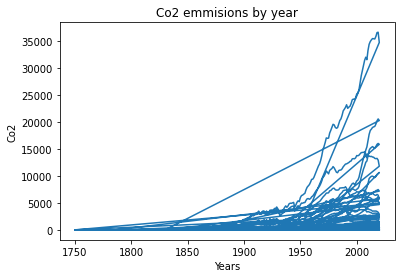

In [9]:
#Lets visualize Total increase by Year:

plt.xlabel('Years')

plt.ylabel('Co2')

plt.rcParams["figure.figsize"] = [10,5]

plt.title('Co2 emmisions by year')


plt.plot(co2_data["year"],co2_data["co2"])

## Cleaning the data

In [10]:
#Removing excess data that does not contain North America
co2_data_copy = co2_data.drop(range(0,16951))

In [11]:
co2_data_cleaned = co2_data_copy.drop(range(17021,25989))
co2_data_cleaned

,iso_code,country,year,co2,co2_per_capita,trade_co2,cement_co2,cement_co2_per_capita,coal_co2,coal_co2_per_capita,...,ghg_excluding_lucf_per_capita,methane,methane_per_capita,nitrous_oxide,nitrous_oxide_per_capita,population,gdp,primary_energy_consumption,energy_per_capita,energy_per_gdp
16951,NaN,North America,1951,2840.649,12.400,NaN,24.354,0.106,1311.059,5.723,...,NaN,NaN,NaN,NaN,NaN,231441368.0,NaN,NaN,NaN,NaN
16952,NaN,North America,1952,2768.178,11.865,NaN,24.793,0.106,1166.979,5.002,...,NaN,NaN,NaN,NaN,NaN,235649103.0,NaN,NaN,NaN,NaN
16953,NaN,North America,1953,2831.916,11.906,NaN,26.359,0.111,1152.006,4.843,...,NaN,NaN,NaN,NaN,NaN,240198158.0,NaN,NaN,NaN,NaN
16954,NaN,North America,1954,2718.204,11.202,NaN,27.053,0.112,996.425,4.106,...,NaN,NaN,NaN,NaN,NaN,245015316.0,NaN,NaN,NaN,NaN
16955,NaN,North America,1955,2966.226,11.977,NaN,29.971,0.121,1101.369,4.447,...,NaN,NaN,NaN,NaN,NaN,250035147.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17016,NaN,North America,2016,6471.360,11.353,309.904,70.858,0.124,1509.631,2.648,...,NaN,NaN,NaN,NaN,NaN,573814461.0,NaN,NaN,NaN,NaN
17017,NaN,North America,2017,6412.982,11.155,335.009,72.914,0.127,1467.602,2.553,...,NaN,NaN,NaN,NaN,NaN,578582963.0,NaN,NaN,NaN,NaN
17018,NaN,North America,2018,6588.630,11.366,345.915,74.787,0.129,1398.979,2.413,...,NaN,NaN,NaN,NaN,NaN,582921781.0,NaN,NaN,NaN,NaN
17019,NaN,North America,2019,6460.726,11.056,354.353,76.925,0.132,1214.329,2.078,...,NaN,NaN,NaN,NaN,NaN,587512621.0,NaN,NaN,NaN,NaN


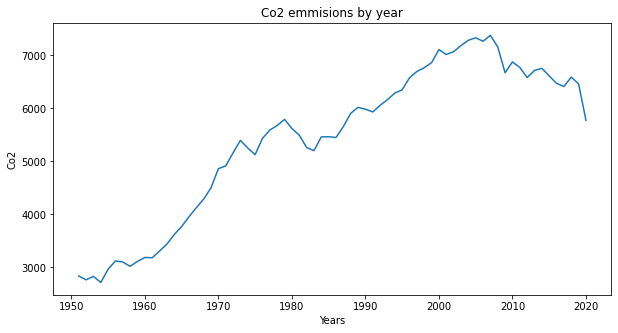

In [13]:
#Lets visualize Total increase by Year:

plt.xlabel('Years')

plt.ylabel('Co2')

plt.rcParams["figure.figsize"] = [10,5]

plt.title('Co2 emmisions by year')


plt.plot(co2_data_cleaned["year"],co2_data_cleaned["co2"])

In [ ]:
co2_data_cleaned.describe()

## Making Predicitons


In [ ]:
#test and train split

In [14]:
x = co2_data_cleaned['year']

In [15]:
y = co2_data_cleaned['co2']

In [16]:
# Training model in order to make predictions
X_train,X_test,y_train,y_test = train_test_split(x.values.reshape(-1,1),y,test_size=.3)

In [17]:
print(X_train.shape,y_test.shape)

(49, 1) (21,)


In [18]:
y_train.head(10)

16979    5792.359
16958    3022.679
16969    4501.680
16991    5932.717
17008    7158.262
16987    5656.467
17017    6412.982
16955    2966.226
17020    5775.159
16999    6861.782
Name: co2, dtype: float64

In [20]:
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

# Making Predictions with the model

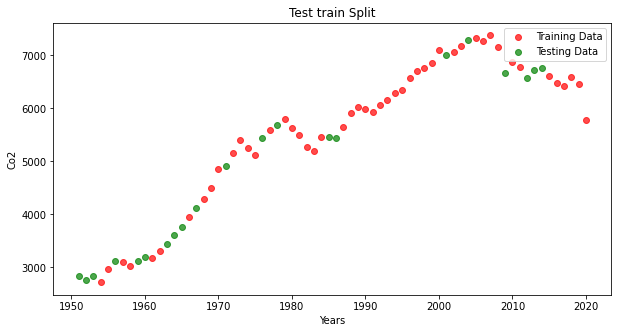

In [21]:
#Plotting trained data with test results
plt.xlabel('Years')
plt.ylabel('Co2')
plt.scatter(X_train,y_train,label = 'Training Data', color ='r', alpha=.7)
plt.scatter(X_test,y_test,label = 'Testing Data', color ='g', alpha=.7)
plt.legend()
plt.title("Test train Split")
plt.show()

## Using the results from this model we can make predictions about possible Co2 levels in the future

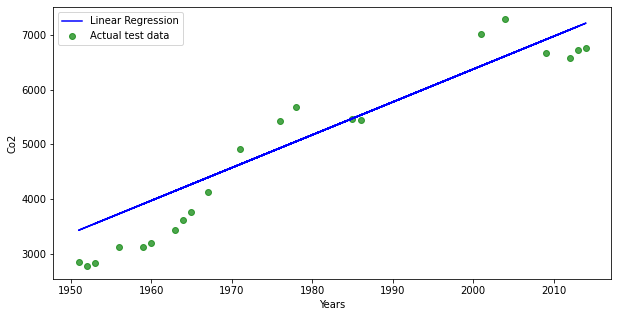

In [22]:
#Use model to predict on Test Data
prediction = lr.predict(X_test)

#Plot prediction line against actual test data
plt.xlabel('Years')
plt.ylabel('Co2')
plt.plot(X_test,prediction,label='Linear Regression',color='b')
plt.scatter(X_test,y_test,label='Actual test data',color='g',alpha=.7)
plt.legend()

### Here is a prediction for Co2 in 2025


In [23]:
#Predict Co2 for 2025
print("Co2 level in 2025 Prediction :", lr.predict(np.array([[2025]]))[0])

Co2 level in 2025 Prediction : 7874.4782506089105


In [24]:
#Score the model
print("Linear regression model score :",lr.score(X_test,y_test))

Linear regression model score : 0.8770192480245305


## Due to outliers during Covid-19 Co2 emmisions decresed in 2019-2020

In [25]:
#Now comparing predicted values to actual test values
print("Co2 level in 2019 Prediction :", lr.predict(np.array([[2019]]))[0])
print("Co2 level in 2019 :",co2_data_cleaned['co2'].iloc[68])

Co2 level in 2019 Prediction : 7514.097996714016
Co2 level in 2019 : 6460.726


## This prediction shows an accurate reading of the data in 2010

In [26]:

print("Co2 level in 2010 Prediction :", lr.predict(np.array([[2010]]))[0])
print("Co2 level in 2010 :",co2_data_cleaned['co2'].iloc[59])

Co2 level in 2010 Prediction : 6973.527615871673
Co2 level in 2010 : 6875.767


## As more historical data is tested the correlation is weaker

In [27]:
print("Co2 level in 2005 Prediction :", lr.predict(np.array([[2005]]))[0])
print("Co2 level in 2005 :",co2_data_cleaned['co2'].iloc[54])

Co2 level in 2005 Prediction : 6673.210737625923
Co2 level in 2005 : 7330.253


In [28]:
print("Co2 level in 2000 Prediction :", lr.predict(np.array([[2000]]))[0])
print("Co2 level in 2000 :",co2_data_cleaned['co2'].iloc[49])

Co2 level in 2000 Prediction : 6372.893859380172
Co2 level in 2000 : 7107.692


In [29]:
print("Co2 level in 1980 Prediction :", lr.predict(np.array([[1980]]))[0])
print("Co2 level in 1980 :",co2_data_cleaned['co2'].iloc[29])

Co2 level in 1980 Prediction : 5171.6263463971845
Co2 level in 1980 : 5621.038


# Conclusion

### Given this score this model shows a high degree of accuracy, the results show that this model can be used to reliably predict future Co2 emmisions. After testing the model against historical data it shows that it is relativly accurate at predicting Co2 levels with a slight deviation from actual test data. 

In [ ]:
#Score the model
print("Linear regression model score :",lr.score(X_test,y_test))